In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jinja2 import Environment, FileSystemLoader, Template
import datetime
from sqlalchemy import create_engine
from json import load

In [5]:
fichierConfig = "config.json"
with open(fichierConfig) as fichier:
    config = load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

In [14]:
realisateur= input("Entrez un nom de realisateur")
print(realisateur)


jan suter


In [15]:
requete_realisateur = """
SELECT * FROM catalog 
    JOIN catalog_director ON catalog_director.show_id = catalog.show_id
    JOIN director ON catalog_director.director_id = director.director_id
    JOIN catalog_actor ON catalog_actor.show_id = catalog.show_id
    JOIN actor ON catalog_actor.actor_id = actor.actor_id
    JOIN catalog_country ON catalog_country.show_id = catalog.show_id
    JOIN country ON country.country_id = catalog_country.country_id
    JOIN catalog_category ON catalog_category.show_id = catalog.show_id
    JOIN category ON category.category_id = catalog_category.category_id
    WHERE director_name = "%s";
    """%(realisateur)

In [16]:
dfrealisateur = pd.read_sql_query(requete_realisateur,engine)
dfrealisateur

2020-12-22 12:12:54,523 INFO sqlalchemy.engine.base.OptionEngine 
SELECT * FROM catalog 
    JOIN catalog_director ON catalog_director.show_id = catalog.show_id
    JOIN director ON catalog_director.director_id = director.director_id
    JOIN catalog_actor ON catalog_actor.show_id = catalog.show_id
    JOIN actor ON catalog_actor.actor_id = actor.actor_id
    JOIN catalog_country ON catalog_country.show_id = catalog.show_id
    JOIN country ON country.country_id = catalog_country.country_id
    JOIN catalog_category ON catalog_category.show_id = catalog.show_id
    JOIN category ON category.category_id = catalog_category.category_id
    WHERE director_name = "jan suter";
    
2020-12-22 12:12:54,525 INFO sqlalchemy.engine.base.OptionEngine {}


,show_id,type,title,date_added,release_year,rating,duration,description,show_id,director_id,...,actor_id,actor_name,show_id,country_id,country_id,country_name,show_id,category_id,category_id,category_name
0,80079427,Movie,Ricardo O'Farrill Abrazo Genial,2016-01-22,2016,TV-MA,92,"Ricardo O'Farrill brings his sharp, observatio...",80079427,539,...,16369,Ricardo O'Farrill,80079427,25,25,Mexico,80079427,3,3,Stand-Up Comedy
1,80097641,Movie,Sofía Niño de Rivera: Exposed,2016-06-24,2016,TV-MA,80,Self-deprecating comic Sofía Niño de Rivera pu...,80097641,539,...,10966,Sofía Niño de Rivera,80097641,25,25,Mexico,80097641,3,3,Stand-Up Comedy
2,80124724,Movie,Alan Saldaña: Mi vida de pobre,2017-08-04,2017,TV-MA,54,Mexican comic Alan Saldaña has fun with everyt...,80124724,539,...,21965,Alan Saldaña,80124724,25,25,Mexico,80124724,3,3,Stand-Up Comedy
3,80124725,Movie,Carlos Ballarta: El amor es de putos,2016-11-21,2016,TV-MA,67,"Carlos Ballarta mocks daily life in Mexico, in...",80124725,539,...,6757,Carlos Ballarta,80124725,25,25,Mexico,80124725,3,3,Stand-Up Comedy
4,80124726,Movie,Daniel Sosa: Sosafado,2017-02-03,2017,TV-MA,78,Comedian Daniel Sosa inhabits various characte...,80124726,539,...,13255,Daniel Sosa,80124726,25,25,Mexico,80124726,3,3,Stand-Up Comedy
5,80124727,Movie,Simplemente Manu NNa,2017-05-05,2017,TV-MA,72,Eclectic stand-up comic Manu NNa relays everyd...,80124727,539,...,6425,Manu NNa,80124727,25,25,Mexico,80124727,3,3,Stand-Up Comedy
6,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,6757,Carlos Ballarta,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
7,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,10966,Sofía Niño de Rivera,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
8,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,16369,Ricardo O'Farrill,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy
9,80124728,Movie,Ricardo O'Farrill: Abrazo navideño,2016-12-12,2016,TV-MA,31,The expressive Ricardo O'Farrill uses his astu...,80124728,539,...,21315,Chumel Torres,80124728,25,25,Mexico,80124728,3,3,Stand-Up Comedy


In [17]:
datafilm = dfrealisateur[['category_name','title']]
datafilm

,category_name,title
0,Stand-Up Comedy,Ricardo O'Farrill Abrazo Genial
1,Stand-Up Comedy,Sofía Niño de Rivera: Exposed
2,Stand-Up Comedy,Alan Saldaña: Mi vida de pobre
3,Stand-Up Comedy,Carlos Ballarta: El amor es de putos
4,Stand-Up Comedy,Daniel Sosa: Sosafado
5,Stand-Up Comedy,Simplemente Manu NNa
6,Stand-Up Comedy,Ricardo O'Farrill: Abrazo navideño
7,Stand-Up Comedy,Ricardo O'Farrill: Abrazo navideño
8,Stand-Up Comedy,Ricardo O'Farrill: Abrazo navideño
9,Stand-Up Comedy,Ricardo O'Farrill: Abrazo navideño


In [18]:
datafilm = datafilm.drop_duplicates()
datafilm

,category_name,title
0,Stand-Up Comedy,Ricardo O'Farrill Abrazo Genial
1,Stand-Up Comedy,Sofía Niño de Rivera: Exposed
2,Stand-Up Comedy,Alan Saldaña: Mi vida de pobre
3,Stand-Up Comedy,Carlos Ballarta: El amor es de putos
4,Stand-Up Comedy,Daniel Sosa: Sosafado
5,Stand-Up Comedy,Simplemente Manu NNa
6,Stand-Up Comedy,Ricardo O'Farrill: Abrazo navideño
11,Stand-Up Comedy,Mea Culpa
12,Stand-Up Comedy,Sofía Niño de Rivera: Selección Natural
13,Stand-Up Comedy,"El Especial de Alex Fernández, el Especial"


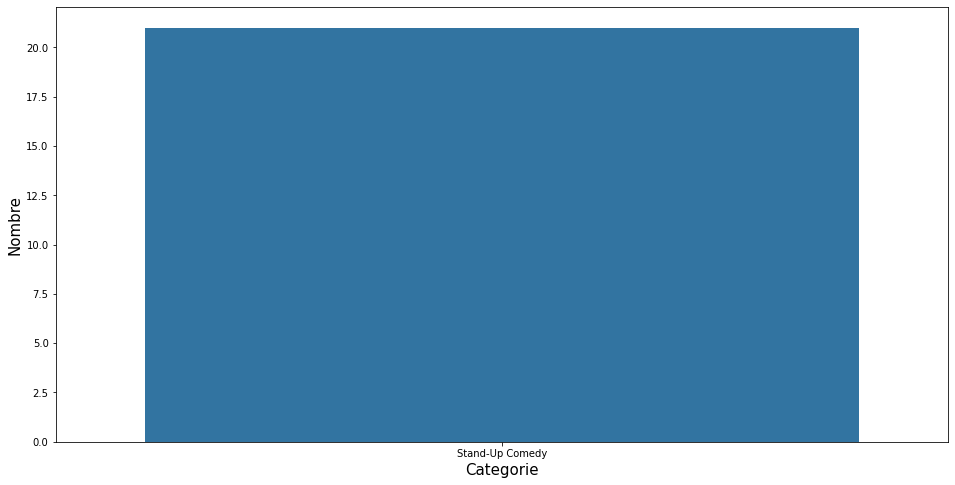

In [19]:
plt.figure(figsize=[16,8])
sns.countplot(x="category_name" ,data=datafilm, order = datafilm['category_name'].value_counts().keys())
plt.xlabel("Categorie",fontsize=15)
plt.ylabel("Nombre",fontsize=15)
plt.savefig("img/category.jpg", dpi = 80, format="jpg")

In [20]:
datactor = dfrealisateur[['actor_name','title']]
datactor = datactor.drop_duplicates()
datactor


,actor_name,title
0,Ricardo O'Farrill,Ricardo O'Farrill Abrazo Genial
1,Sofía Niño de Rivera,Sofía Niño de Rivera: Exposed
2,Alan Saldaña,Alan Saldaña: Mi vida de pobre
3,Carlos Ballarta,Carlos Ballarta: El amor es de putos
4,Daniel Sosa,Daniel Sosa: Sosafado
5,Manu NNa,Simplemente Manu NNa
6,Carlos Ballarta,Ricardo O'Farrill: Abrazo navideño
7,Sofía Niño de Rivera,Ricardo O'Farrill: Abrazo navideño
8,Ricardo O'Farrill,Ricardo O'Farrill: Abrazo navideño
9,Chumel Torres,Ricardo O'Farrill: Abrazo navideño


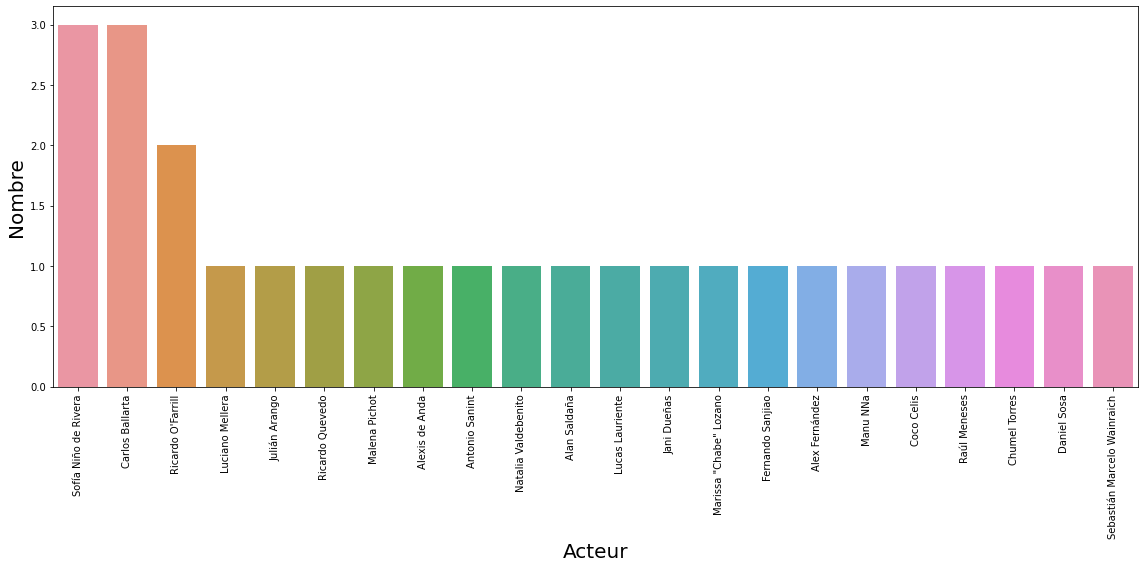

In [21]:
plt.figure(figsize=[16,8])
sns.countplot(x="actor_name" ,data=datactor, order = datactor['actor_name'].value_counts().keys())
plt.xlabel("Acteur",fontsize=20)
plt.ylabel("Nombre",fontsize=20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig("img/acteur.jpg", dpi = 80, format="jpg")

In [22]:
datacountry= dfrealisateur[['country_name','title']]
datacountry = datacountry.drop_duplicates()
datacountry

,country_name,title
0,Mexico,Ricardo O'Farrill Abrazo Genial
1,Mexico,Sofía Niño de Rivera: Exposed
2,Mexico,Alan Saldaña: Mi vida de pobre
3,Mexico,Carlos Ballarta: El amor es de putos
4,Mexico,Daniel Sosa: Sosafado
5,Mexico,Simplemente Manu NNa
6,Mexico,Ricardo O'Farrill: Abrazo navideño
11,Mexico,Mea Culpa
12,Mexico,Sofía Niño de Rivera: Selección Natural
13,Mexico,"El Especial de Alex Fernández, el Especial"


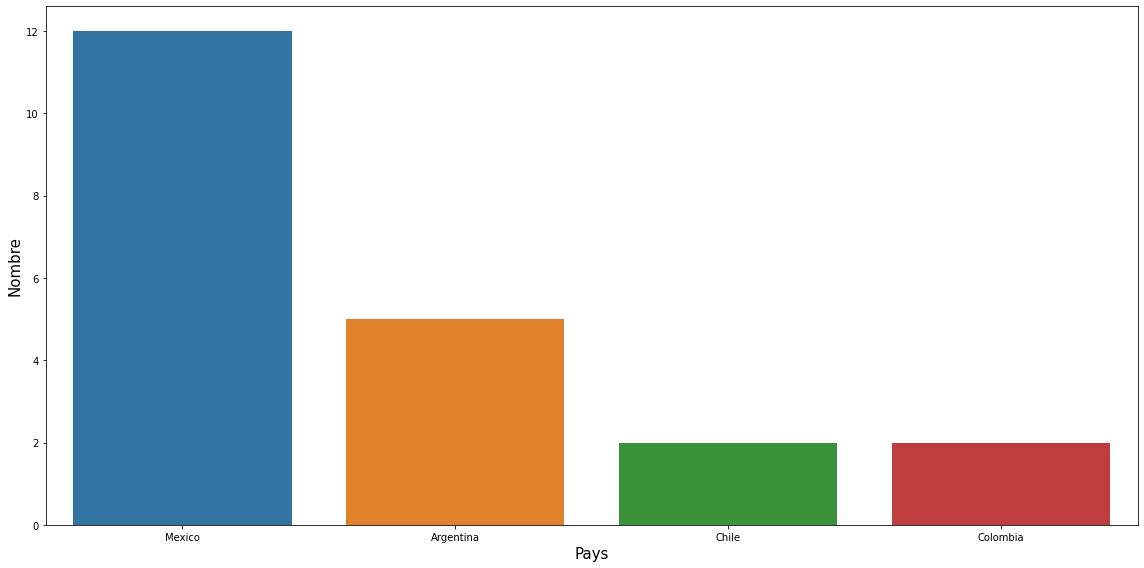

In [47]:
plt.figure(figsize=[16,8])
sns.countplot(x="country_name" ,data=datacountry, order = datacountry['country_name'].value_counts().keys())
plt.xlabel("Pays",fontsize=15)
plt.ylabel("Nombre",fontsize=15)
plt.tight_layout()
plt.savefig("img/pays.jpg", dpi = 80, format="jpg")

In [24]:
datatitre = dfrealisateur[['title']]
datatitre = datatitre.drop_duplicates()
datatitre

,title
0,Ricardo O'Farrill Abrazo Genial
1,Sofía Niño de Rivera: Exposed
2,Alan Saldaña: Mi vida de pobre
3,Carlos Ballarta: El amor es de putos
4,Daniel Sosa: Sosafado
5,Simplemente Manu NNa
6,Ricardo O'Farrill: Abrazo navideño
11,Mea Culpa
12,Sofía Niño de Rivera: Selección Natural
13,"El Especial de Alex Fernández, el Especial"


In [76]:
TMPL_DIR = "template"
fichier = "index2.jinja"

templateloader = FileSystemLoader(searchpath=TMPL_DIR)
templateEnv = Environment(loader = templateloader)
template = templateEnv.get_template(fichier)

data = {
            'nom': realisateur,
            'time_stamp':datetime.datetime.now().strftime("%x %X"),
            'films' : datatitre
}
print(template.render(data))

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no" />
        <meta name="description" content="" />
        <meta name="author" content="" />
        <title>Agency - Start Bootstrap Theme</title>
        <link rel="icon" type="image/x-icon" href="assets/img/favicon.ico" />
        <!-- Font Awesome icons (free version)-->
        <script src="https://use.fontawesome.com/releases/v5.15.1/js/all.js" crossorigin="anonymous"></script>
        <!-- Google fonts-->
        <link href="https://fonts.googleapis.com/css?family=Montserrat:400,700" rel="stylesheet" type="text/css" />
        <link href="https://fonts.googleapis.com/css?family=Droid+Serif:400,700,400italic,700italic" rel="stylesheet" type="text/css" />
        <link href="https://fonts.googleapis.com/css?family=Roboto+Slab:400,100,300,700" rel="stylesheet" type="text/css" />
        <!-- Core theme CSS (includes

In [75]:
outputText = template.render(data)
html_file = open('index.html', 'w')
html_file.write(outputText)
html_file.close()